In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/all_train.csv.gz', compression='gzip')

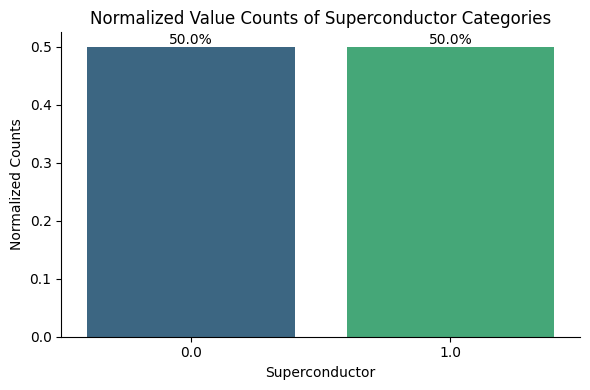

In [13]:
# Look at the targets distribution
target_dt=data["# label"].value_counts(normalize=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=target_dt.index, y=target_dt.values, palette="viridis")
plt.xlabel("Superconductor")
plt.ylabel("Normalized Counts")
plt.title("Normalized Value Counts of Superconductor Categories")
sns.despine()
ax.yaxis.grid(False)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [6]:
#Split Data
from sklearn.model_selection import train_test_split
y=data['# label']
x=data.drop('# label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
#Scale Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Model time

> 2 Dense layers with 1000 Epochs! and 500 batch_size

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import make_scorer, accuracy_score, precision_score,confusion_matrix,f1_score,recall_score
from sklearn.metrics import classification_report

In [9]:
model_sc=tf.keras.Sequential()
model_sc.add(layers.Dense(100,activation='tanh'))
model_sc.add(layers.Dropout(.3))
model_sc.add(layers.Dense(1,activation='sigmoid'))

model_sc.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.binary_crossentropy,
                 metrics=['accuracy'])

In [10]:
#Stopped half an hour later since accuracy was barely improving from 36-66
model_sc.fit(X_train, y_train, epochs=1000, batch_size=500, verbose=2)

Epoch 1/1000
9800/9800 - 16s - loss: 0.3326 - accuracy: 0.8451 - 16s/epoch - 2ms/step
Epoch 2/1000
9800/9800 - 23s - loss: 0.3107 - accuracy: 0.8547 - 23s/epoch - 2ms/step
Epoch 3/1000
9800/9800 - 24s - loss: 0.3069 - accuracy: 0.8563 - 24s/epoch - 2ms/step
Epoch 4/1000
9800/9800 - 21s - loss: 0.3051 - accuracy: 0.8573 - 21s/epoch - 2ms/step
Epoch 5/1000
9800/9800 - 28s - loss: 0.3041 - accuracy: 0.8579 - 28s/epoch - 3ms/step
Epoch 6/1000
9800/9800 - 24s - loss: 0.3031 - accuracy: 0.8583 - 24s/epoch - 2ms/step
Epoch 7/1000
9800/9800 - 22s - loss: 0.3027 - accuracy: 0.8586 - 22s/epoch - 2ms/step
Epoch 8/1000
9800/9800 - 25s - loss: 0.3022 - accuracy: 0.8587 - 25s/epoch - 3ms/step
Epoch 9/1000
9800/9800 - 28s - loss: 0.3020 - accuracy: 0.8589 - 28s/epoch - 3ms/step
Epoch 10/1000
9800/9800 - 47s - loss: 0.3017 - accuracy: 0.8590 - 47s/epoch - 5ms/step
Epoch 11/1000
9800/9800 - 48s - loss: 0.3016 - accuracy: 0.8592 - 48s/epoch - 5ms/step
Epoch 12/1000
9800/9800 - 46s - loss: 0.3014 - accur

KeyboardInterrupt: 

In [11]:
y_pred = model_sc.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)


65625/65625 [==============================] - 68s 1ms/step


In [12]:
accuracy

0.8687452380952381

In [16]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86   1048432
         1.0       0.85      0.90      0.87   1051568

    accuracy                           0.87   2100000
   macro avg       0.87      0.87      0.87   2100000
weighted avg       0.87      0.87      0.87   2100000



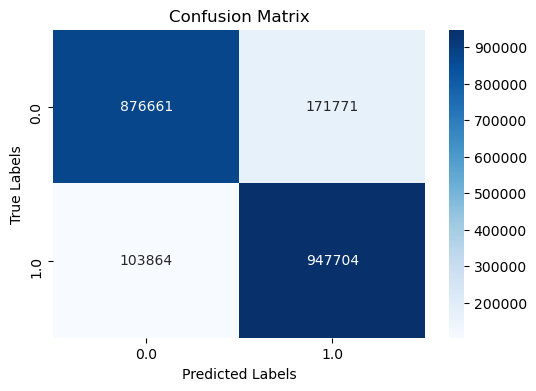

In [20]:
# Confusion Matrix
class_names = list(set(data['# label']))
cm=confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

> Providing validation data to stop early lower batch size

In [13]:
X_val, X_test_1, y_val, y_test_1 = train_test_split(X_test, y_test, test_size=0.90, random_state=42)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
safety=EarlyStopping(monitor="val_loss",patience=1,min_delta=0.001,mode='auto',restore_best_weights=True)

model_scStopEarly=tf.keras.Sequential()
model_scStopEarly.add(layers.Dense(100,activation='tanh'))
model_scStopEarly.add(layers.Dropout(.3))
model_scStopEarly.add(layers.Dense(1,activation='sigmoid'))

model_scStopEarly.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.binary_crossentropy,
                 metrics=['accuracy'])

model_scStopEarly.fit(X_train, y_train, epochs=1000, validation_data=(X_val,y_val),batch_size=20, callbacks=[safety])

Epoch 1/1000
245000/245000 [==============================] - 341s 1ms/step - loss: 0.3145 - accuracy: 0.8528 - val_loss: 0.2937 - val_accuracy: 0.8639
Epoch 2/1000
245000/245000 [==============================] - 346s 1ms/step - loss: 0.3057 - accuracy: 0.8570 - val_loss: 0.2911 - val_accuracy: 0.8659
Epoch 3/1000
245000/245000 [==============================] - 328s 1ms/step - loss: 0.3042 - accuracy: 0.8580 - val_loss: 0.2901 - val_accuracy: 0.8660


In [21]:
y_pred_1 = model_scStopEarly.predict(X_test_1)
y_pred_binary_1 = (y_pred_1 > 0.5).astype(int)
accuracy_1 = accuracy_score(y_test_1, y_pred_binary_1)

59063/59063 [==============================] - 42s 711us/step


In [22]:
accuracy_1

0.8645047619047619

In [23]:
print(classification_report(y_test_1, y_pred_binary_1))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86    943605
         1.0       0.86      0.87      0.87    946395

    accuracy                           0.86   1890000
   macro avg       0.86      0.86      0.86   1890000
weighted avg       0.86      0.86      0.86   1890000



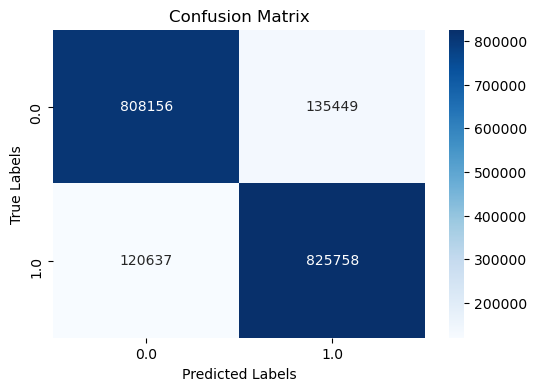

In [24]:
# Confusion Matrix
class_names = list(set(data['# label']))
cm=confusion_matrix(y_test_1, y_pred_binary_1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

> More dense layers

In [25]:
#Stopped at 84 epochs since scores were no increasing
model_sc_moreLayers=tf.keras.Sequential()
model_sc_moreLayers.add(layers.Dense(100,activation='tanh'))
model_sc_moreLayers.add(layers.Dropout(.3))
model_sc_moreLayers.add(layers.Dense(50,activation='relu'))
model_sc_moreLayers.add(layers.Dropout(.3))
model_sc_moreLayers.add(layers.Dense(30,activation='tanh'))
model_sc_moreLayers.add(layers.Dropout(.3))
model_sc_moreLayers.add(layers.Dense(1,activation='sigmoid'))

model_sc_moreLayers.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.binary_crossentropy,
                 metrics=['accuracy'])

model_sc_moreLayers.fit(X_train, y_train, epochs=25, batch_size=500, verbose=2)

Epoch 1/25
9800/9800 - 48s - loss: 0.3148 - accuracy: 0.8542 - 48s/epoch - 5ms/step
Epoch 2/25
9800/9800 - 52s - loss: 0.3025 - accuracy: 0.8606 - 52s/epoch - 5ms/step
Epoch 3/25
9800/9800 - 57s - loss: 0.2994 - accuracy: 0.8625 - 57s/epoch - 6ms/step
Epoch 4/25
9800/9800 - 52s - loss: 0.2976 - accuracy: 0.8637 - 52s/epoch - 5ms/step
Epoch 5/25
9800/9800 - 50s - loss: 0.2964 - accuracy: 0.8644 - 50s/epoch - 5ms/step
Epoch 6/25
9800/9800 - 47s - loss: 0.2955 - accuracy: 0.8650 - 47s/epoch - 5ms/step
Epoch 7/25
9800/9800 - 48s - loss: 0.2949 - accuracy: 0.8654 - 48s/epoch - 5ms/step
Epoch 8/25
9800/9800 - 48s - loss: 0.2942 - accuracy: 0.8658 - 48s/epoch - 5ms/step
Epoch 9/25
9800/9800 - 45s - loss: 0.2939 - accuracy: 0.8661 - 45s/epoch - 5ms/step
Epoch 10/25
9800/9800 - 49s - loss: 0.2936 - accuracy: 0.8663 - 49s/epoch - 5ms/step
Epoch 11/25
9800/9800 - 46s - loss: 0.2931 - accuracy: 0.8665 - 46s/epoch - 5ms/step
Epoch 12/25
9800/9800 - 47s - loss: 0.2929 - accuracy: 0.8668 - 47s/epoch 

In [26]:
y_pred_ml = model_sc_moreLayers.predict(X_test)
y_pred_binary_ml = (y_pred_ml > 0.5).astype(int)
accuracy_ml = accuracy_score(y_test, y_pred_binary_ml)


65625/65625 [==============================] - 61s 923us/step


In [27]:
accuracy_ml

0.8738204761904762

In [28]:
print(classification_report(y_test, y_pred_binary_ml))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87   1048432
         1.0       0.85      0.91      0.88   1051568

    accuracy                           0.87   2100000
   macro avg       0.88      0.87      0.87   2100000
weighted avg       0.88      0.87      0.87   2100000



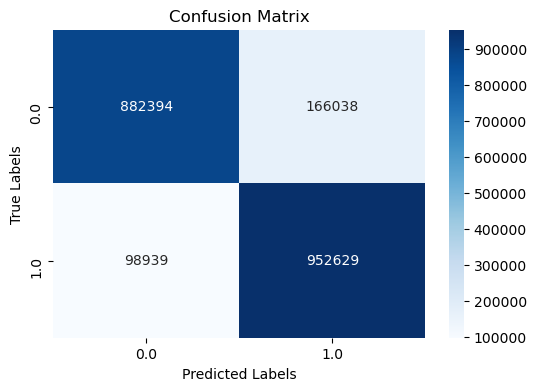

In [29]:
# Confusion Matrix
class_names = list(set(data['# label']))
cm=confusion_matrix(y_test, y_pred_binary_ml)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Bigger Batch_size of 1000

In [30]:
model_sc_moreLayers=tf.keras.Sequential()
model_sc_moreLayers.add(layers.Dense(100,activation='relu'))
model_sc_moreLayers.add(layers.Dense(50,activation='relu'))
model_sc_moreLayers.add(layers.Dropout(.3))
model_sc_moreLayers.add(layers.Dense(30,activation='relu'))
model_sc_moreLayers.add(layers.Dense(1,activation='sigmoid'))

model_sc_moreLayers.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.binary_crossentropy,
                 metrics=['accuracy'])

model_sc_moreLayers.fit(X_train, y_train, epochs=25, batch_size=1000, verbose=2)

Epoch 1/25
4900/4900 - 15s - loss: 0.2965 - accuracy: 0.8632 - 15s/epoch - 3ms/step
Epoch 2/25
4900/4900 - 15s - loss: 0.2791 - accuracy: 0.8728 - 15s/epoch - 3ms/step
Epoch 3/25
4900/4900 - 17s - loss: 0.2740 - accuracy: 0.8758 - 17s/epoch - 3ms/step
Epoch 4/25
4900/4900 - 19s - loss: 0.2715 - accuracy: 0.8772 - 19s/epoch - 4ms/step
Epoch 5/25
4900/4900 - 19s - loss: 0.2700 - accuracy: 0.8781 - 19s/epoch - 4ms/step
Epoch 6/25
4900/4900 - 17s - loss: 0.2690 - accuracy: 0.8785 - 17s/epoch - 4ms/step
Epoch 7/25
4900/4900 - 17s - loss: 0.2682 - accuracy: 0.8789 - 17s/epoch - 4ms/step
Epoch 8/25
4900/4900 - 19s - loss: 0.2675 - accuracy: 0.8795 - 19s/epoch - 4ms/step
Epoch 9/25
4900/4900 - 18s - loss: 0.2670 - accuracy: 0.8797 - 18s/epoch - 4ms/step
Epoch 10/25
4900/4900 - 18s - loss: 0.2665 - accuracy: 0.8799 - 18s/epoch - 4ms/step
Epoch 11/25
4900/4900 - 21s - loss: 0.2662 - accuracy: 0.8802 - 21s/epoch - 4ms/step
Epoch 12/25
4900/4900 - 21s - loss: 0.2658 - accuracy: 0.8803 - 21s/epoch 

In [31]:
y_pred_bt = model_sc_moreLayers.predict(X_test)
y_pred_binary_bt = (y_pred_bt > 0.5).astype(int)
accuracy_bt = accuracy_score(y_test, y_pred_binary_bt)


65625/65625 [==============================] - 50s 767us/step


In [32]:
accuracy_bt

0.8818061904761905

In [33]:
print(classification_report(y_test, y_pred_binary_bt))

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.88   1048432
         1.0       0.85      0.92      0.89   1051568

    accuracy                           0.88   2100000
   macro avg       0.88      0.88      0.88   2100000
weighted avg       0.88      0.88      0.88   2100000



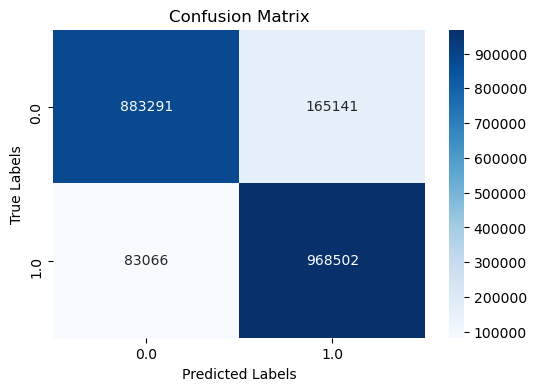

In [34]:
# Confusion Matrix
class_names = list(set(data['# label']))
cm=confusion_matrix(y_test, y_pred_binary_bt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
model_sc_changeNumLayers=tf.keras.Sequential()
model_sc_changeNumLayers.add(layers.Dense(100,activation='relu'))
model_sc_changeNumLayers.add(layers.Dense(20,activation='relu'))
model_sc_changeNumLayers.add(layers.Dropout(.3))
model_sc_changeNumLayers.add(layers.Dense(80,activation='relu'))
model_sc_changeNumLayers.add(layers.Dense(1,activation='sigmoid'))

model_sc_changeNumLayers.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.binary_crossentropy,
                 metrics=['accuracy'])

model_sc_changeNumLayers.fit(X_train, y_train, epochs=25, batch_size=1000, verbose=2)

Epoch 1/25
4900/4900 - 25s - loss: 0.2991 - accuracy: 0.8612 - 25s/epoch - 5ms/step
Epoch 2/25
4900/4900 - 20s - loss: 0.2819 - accuracy: 0.8701 - 20s/epoch - 4ms/step
Epoch 3/25
4900/4900 - 19s - loss: 0.2766 - accuracy: 0.8737 - 19s/epoch - 4ms/step
Epoch 4/25
4900/4900 - 32s - loss: 0.2734 - accuracy: 0.8758 - 32s/epoch - 7ms/step
Epoch 5/25
4900/4900 - 23s - loss: 0.2717 - accuracy: 0.8768 - 23s/epoch - 5ms/step
Epoch 6/25
4900/4900 - 19s - loss: 0.2707 - accuracy: 0.8773 - 19s/epoch - 4ms/step
Epoch 7/25
4900/4900 - 19s - loss: 0.2699 - accuracy: 0.8779 - 19s/epoch - 4ms/step
Epoch 8/25
4900/4900 - 18s - loss: 0.2693 - accuracy: 0.8782 - 18s/epoch - 4ms/step
Epoch 9/25
4900/4900 - 17s - loss: 0.2689 - accuracy: 0.8784 - 17s/epoch - 4ms/step
Epoch 10/25
4900/4900 - 18s - loss: 0.2685 - accuracy: 0.8786 - 18s/epoch - 4ms/step
Epoch 11/25
4900/4900 - 20s - loss: 0.2682 - accuracy: 0.8788 - 20s/epoch - 4ms/step
Epoch 12/25
4900/4900 - 24s - loss: 0.2679 - accuracy: 0.8789 - 24s/epoch 

In [36]:
y_pred_relu = model_sc_changeNumLayers.predict(X_test)
y_pred_binary_relu = (y_pred_relu > 0.5).astype(int)
accuracy_relu = accuracy_score(y_test, y_pred_binary_relu)
accuracy_relu

65625/65625 [==============================] - 79s 1ms/step


0.8749404761904762

In [37]:
print(classification_report(y_test, y_pred_binary_relu))

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.87   1048432
         1.0       0.83      0.95      0.88   1051568

    accuracy                           0.87   2100000
   macro avg       0.88      0.87      0.87   2100000
weighted avg       0.88      0.87      0.87   2100000



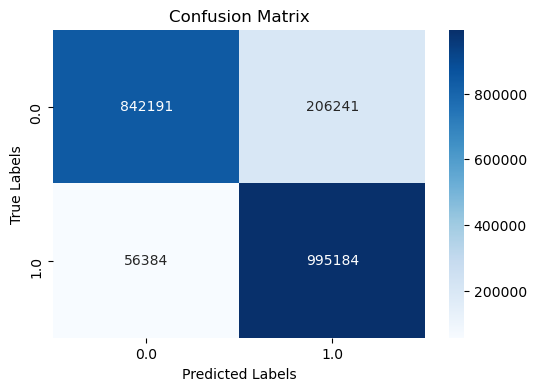

In [38]:
# Confusion Matrix
class_names = list(set(data['# label']))
cm=confusion_matrix(y_test, y_pred_binary_relu)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()